# PARTE 4.1.2. - MODELLING - DECISSION TREE REDUCIDO

## Importación librerías y lectura del DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Lectura DF
df = pd.read_csv('/content/drive/MyDrive/MASTER_DATA_SCIENCE/Entregables & TFM/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/HEART_DISEASE_PREMODELLING.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13308 entries, 0 to 13307
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HEIGHT                         13308 non-null  float64
 1   WAIST_CIRCUMFERENCE_LOG        13308 non-null  float64
 2   SYSTOLIC_MEAN_LOG              13308 non-null  float64
 3   DIASTOLIC_MEAN                 13308 non-null  float64
 4   PULSE_MEAN_LOG                 13308 non-null  float64
 5   ALBUMIN_URINE_LOG              13308 non-null  float64
 6   CREATININE_URINE_LOG           13308 non-null  float64
 7   HDL_LOG                        13308 non-null  float64
 8   TOTAL_CHOLE_LOG                13308 non-null  float64
 9   LYMPHOCYTE_LOG                 13308 non-null  float64
 10  MONOCYTE_LOG                   13308 non-null  float64
 11  SEGM_NEUTROPHILS_LOG           13308 non-null  float64
 12  EOSINOPHILS                    13308 non-null 

In [ ]:
df.shape

(13308, 66)

## TRAIN / TEST SPLIT

In [ ]:
# Separar las características (X) de la variable objetivo (y)
x = df.drop("HEART_DISEASE", axis=1)
y = df["HEART_DISEASE"]

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

corrs = [pearsonr(x.iloc[:, i], y)[0] for i in range(x.shape[1])]
# Seleccionar índices con |corr| ≥ 0.1 (por ejemplo)
idx_sel = [i for i, c in enumerate(corrs) if abs(c) >= 0.1]
# Use .iloc to select columns by integer position
X_reducido = x.iloc[:, idx_sel]

In [ ]:
X_reducido.shape

(13308, 18)

In [ ]:
y.shape

(13308,)

In [ ]:
# Seleccionamos muestra aleatoria
validation = int(len(df) * 0.2)
df_val = df.sample(n=validation, random_state=42)

In [ ]:
# Incluir el resto de los datos en el df_dev
df_dev = df.drop(df_val.index)

In [ ]:
# Comprobar que esten todas las filas
df_val.shape[0]+df_dev.shape[0]

13308

In [ ]:
df_val.shape[0]

2661

In [ ]:
df_dev.shape[0]

10647

In [ ]:
df_dev_x=df_dev.drop("HEART_DISEASE", axis=1)
df_dev_y=df_dev["HEART_DISEASE"]

In [ ]:
df_val_x=df_dev.drop("HEART_DISEASE", axis=1)
df_val_y=df_dev["HEART_DISEASE"]

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_x, df_dev_y, test_size=0.30, random_state=42)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X_reducido, y, test_size=0.30, random_state=42)

In [ ]:
print("El número de columnas en el conjunto de entrenamiento es:", x_train.shape[1])
print("El número de columnas en el conjunto de prueba es:", x_test.shape[1])

El número de columnas en el conjunto de entrenamiento es: 18
El número de columnas en el conjunto de prueba es: 18


In [ ]:
y_train.describe().T.head()

count    9315.000000
mean        0.215674
std         0.411311
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

In [ ]:
y_test.describe().T.head()

count    3993.000000
mean        0.213874
std         0.410090
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

Como la media del target en test y train es la misma, la reparticion de las filas esta balanceada.

## Model definition: DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,
                )

In [ ]:
dt.fit(
    X=x_train,
    y=y_train,
    # sample_weight=None,
    # check_input=True,
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=x_test.columns,
                        class_names=['HasNOTDetections', 'HasDetections'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph2.write_png("tree.png")

True

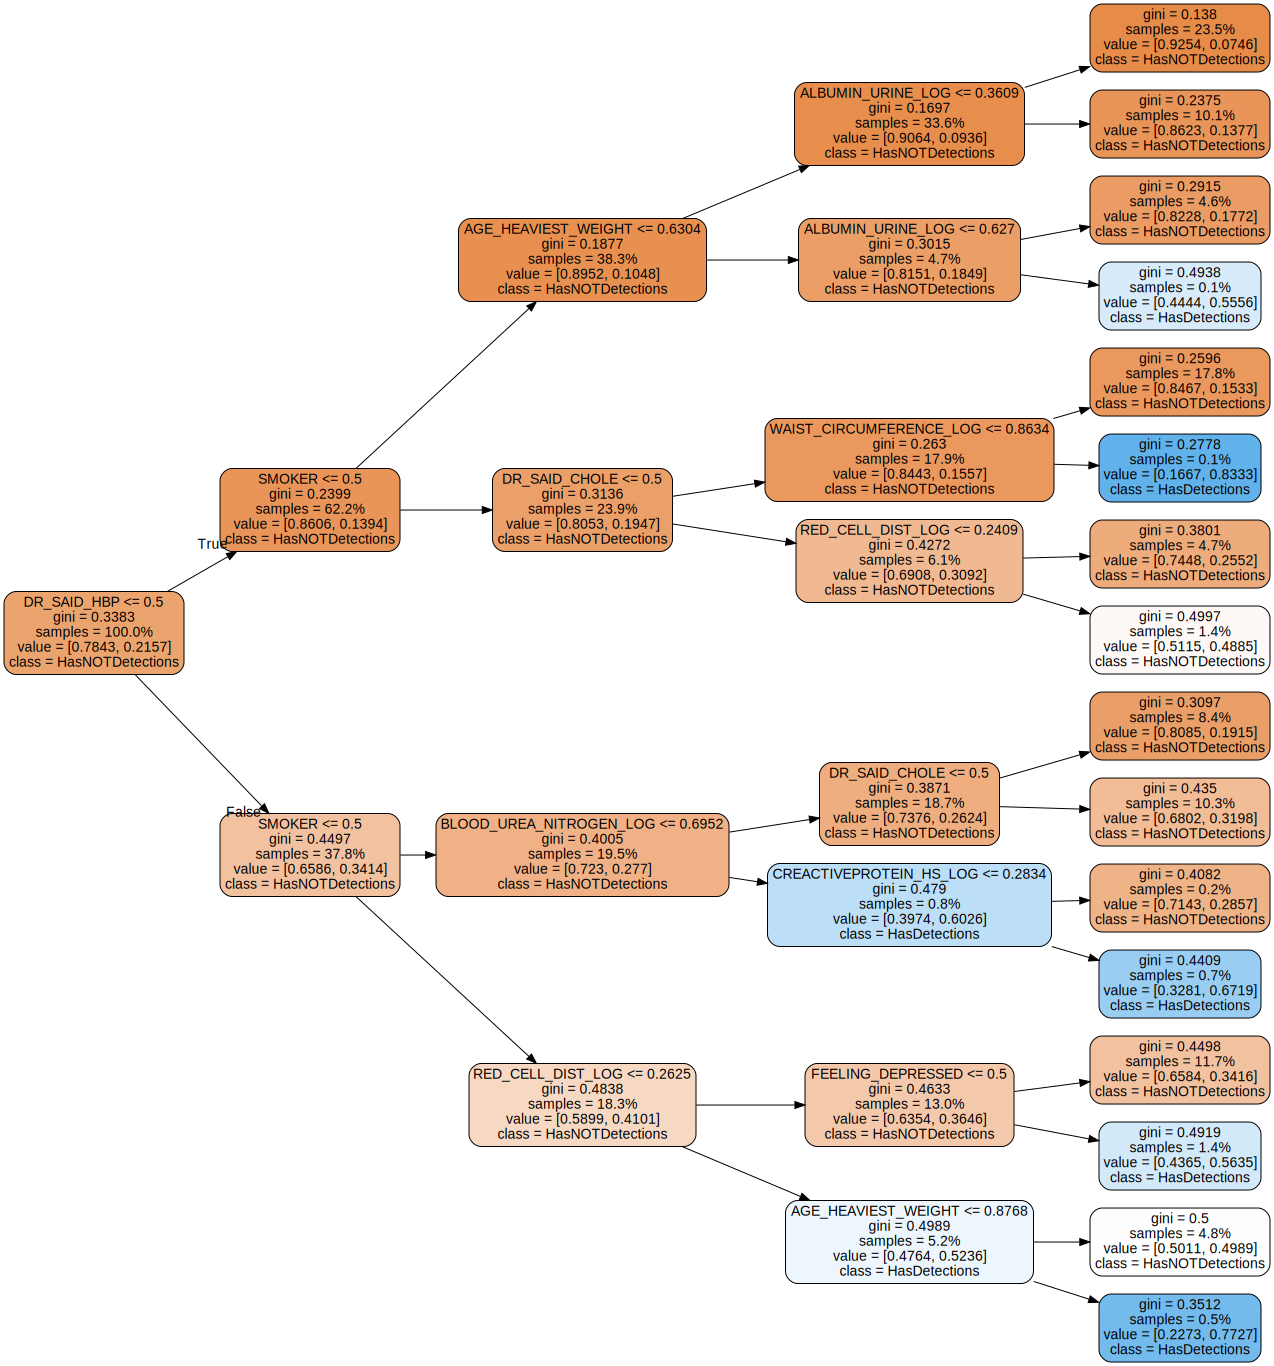

In [ ]:
import graphviz
graphviz.Source(dot_data, format = 'png')

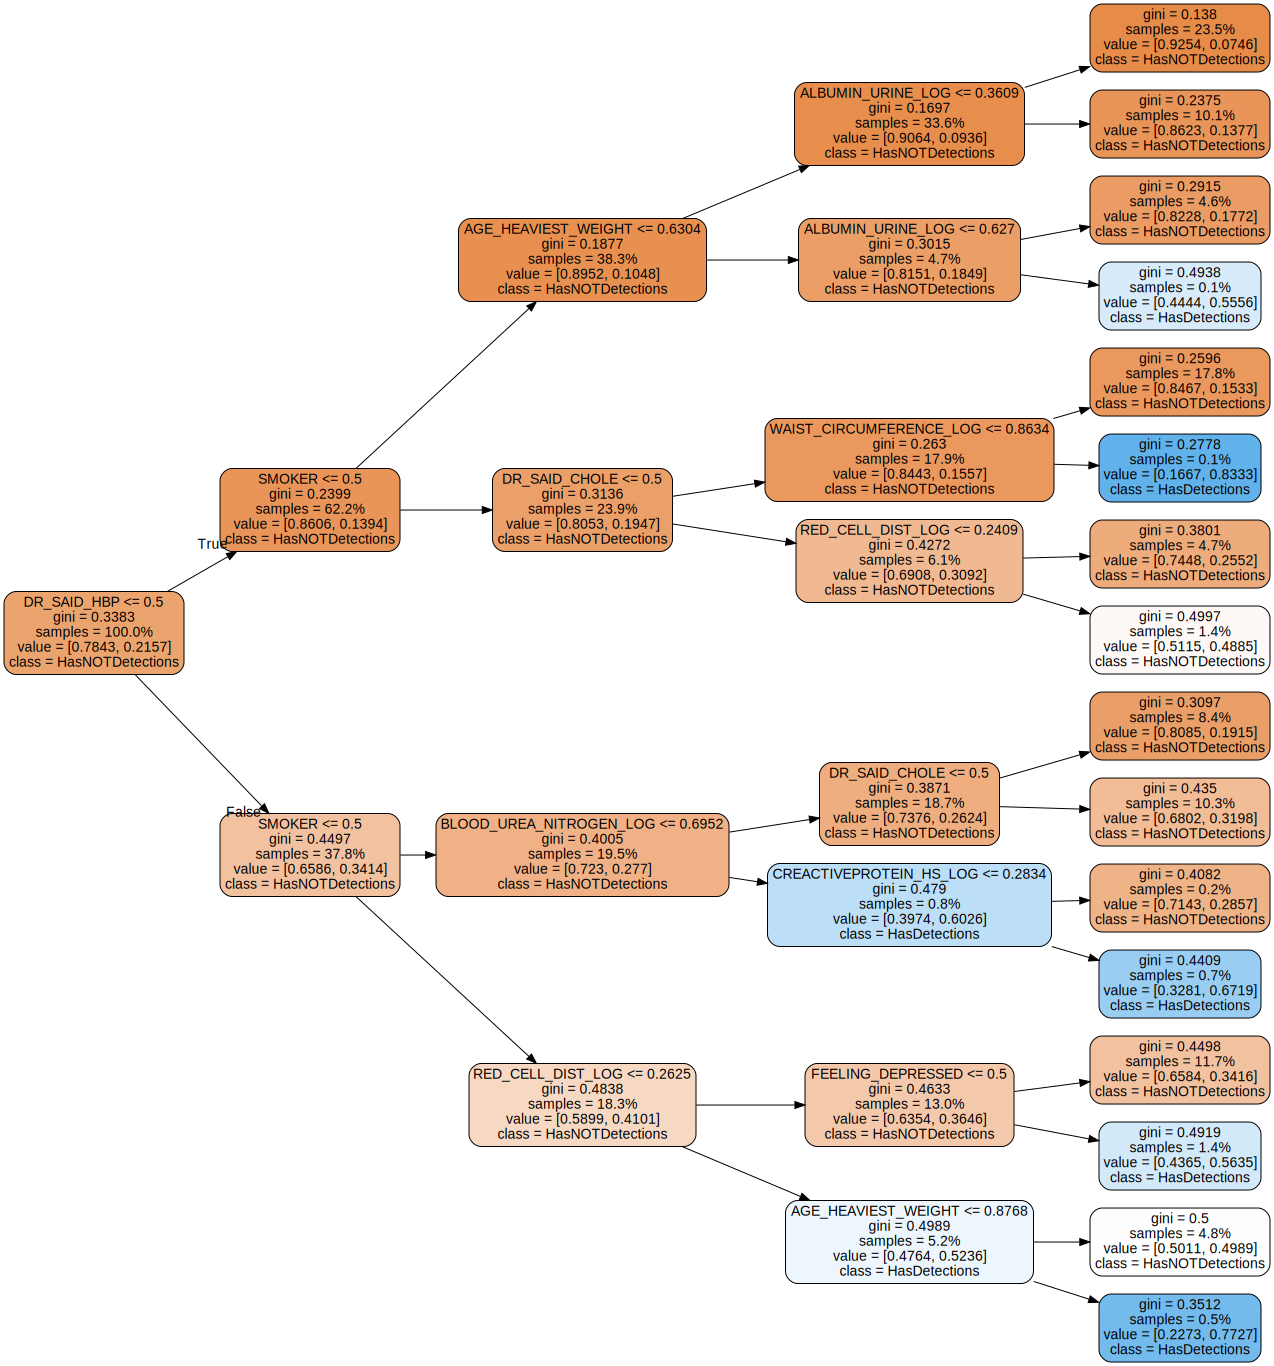

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph2.write_png("tree.png")

from google.colab import files
files.download("tree.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MLC4.3: Model evaluation: DecisionTreeClassifier

#### Opción 1: a través de los resultados

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred.shape

(3993, 1)

In [ ]:
results_df = pd.DataFrame(y_test).join(y_test_pred, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_df['Success'] = (results_df['HEART_DISEASE_original'] == results_df['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_df.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_df['Success'].count()

np.int64(3993)

In [ ]:
results_df['Success'].sum()

np.int64(3131)

In [ ]:
results_df['Success'].mean()

np.float64(0.7841222138742799)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 3131 registros de un total de 3993, por tanto el Accuracy es 0.7841222138742799.


#### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix = pd.crosstab(results_df['HEART_DISEASE_original'] , results_df['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3079  60
1                         802  52

In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7841222138742799)

#### Opción 3: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      3139
           1       0.46      0.06      0.11       854

    accuracy                           0.78      3993
   macro avg       0.63      0.52      0.49      3993
weighted avg       0.72      0.78      0.71      3993



## SOBREMUESTREO

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_resampled:", x_train_resampled.shape)
print("Forma de y_train_resampled:", y_train_resampled.shape)

# Verificar la distribución de clases en el conjunto sobremuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_resampled:")
print(y_train_resampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_resampled: (14612, 18)
Forma de y_train_resampled: (14612,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_resampled:
HEART_DISEASE
0    7306
1    7306
Name: count, dtype: int64


In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,
                )

In [ ]:
dt.fit(
    X=x_train_resampled,
    y=y_train_resampled,
    # sample_weight=None,
    # check_input=True,
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=x_test.columns,
                        class_names=['HasNOTDetections', 'HasDetections'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph2.write_png("tree.png")

True

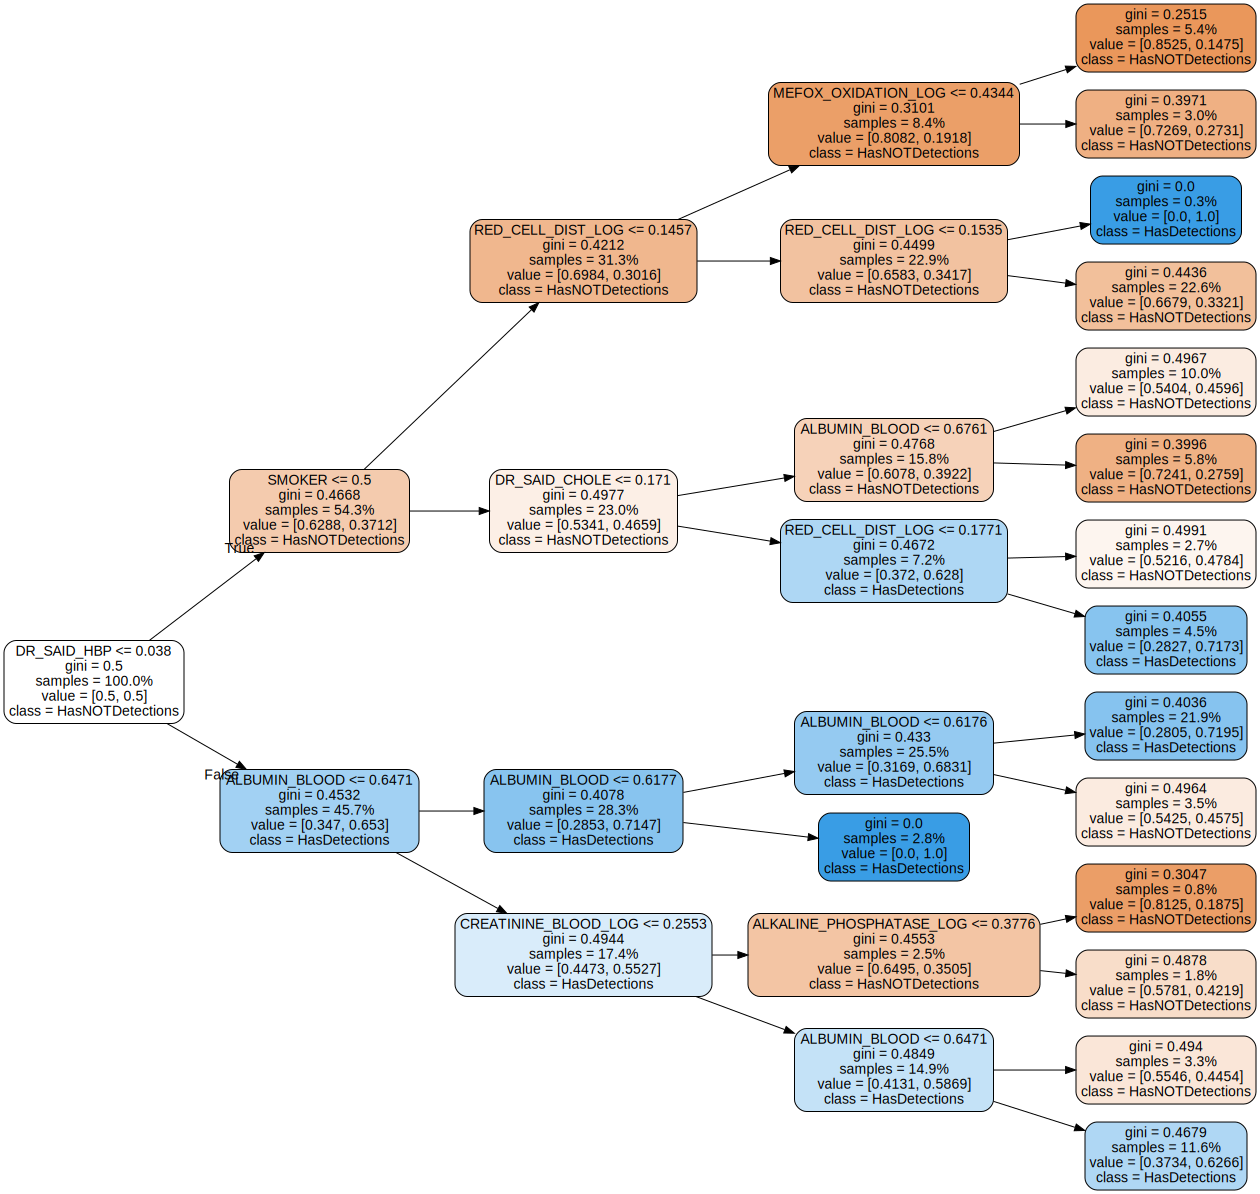

In [ ]:
import graphviz
graphviz.Source(dot_data, format = 'png')

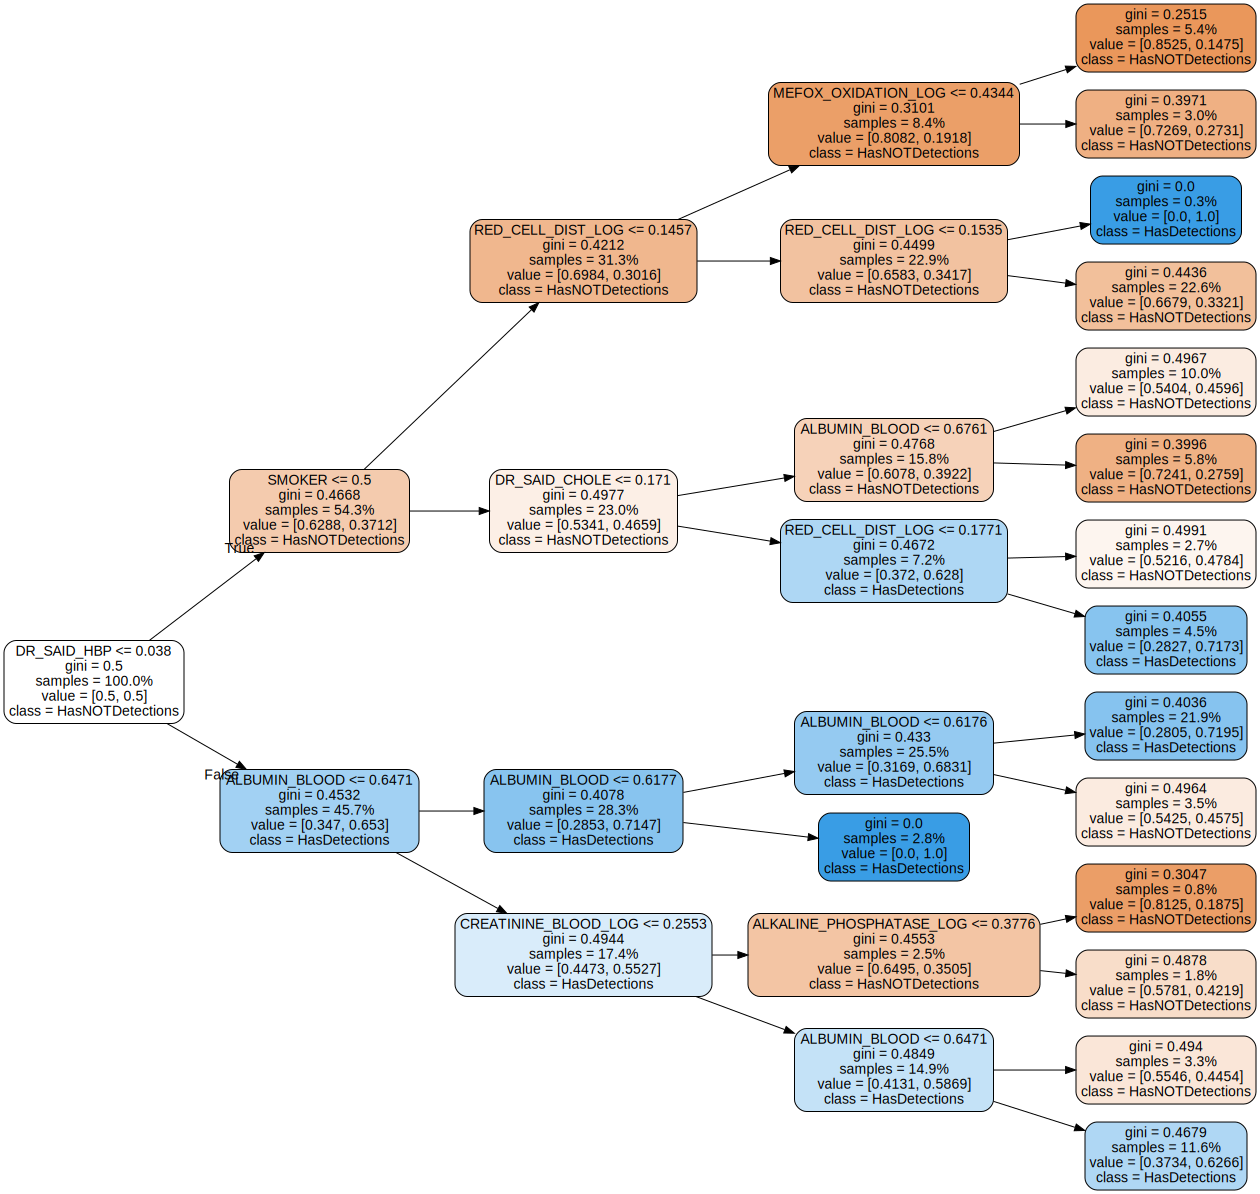

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph2.write_png("tree.png")

from google.colab import files
files.download("tree.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MLC4.3: Model evaluation: DecisionTreeClassifier




#### Opción 1: a través de los resultados

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred.shape

(3993, 1)

In [ ]:
results_df = pd.DataFrame(y_test).join(y_test_pred, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_df['Success'] = (results_df['HEART_DISEASE_original'] == results_df['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_df.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        1        1
399                         0                        0        1
6422                        0                        0        1
10435                       0                        1        0
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_df['Success'].count()

np.int64(3993)

In [ ]:
results_df['Success'].sum()

np.int64(2766)

In [ ]:
results_df['Success'].mean()

np.float64(0.6927122464312547)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 2766 registros de un total de 3993, por tanto el Accuracy es 0.6927122464312547.


#### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix = pd.crosstab(results_df['HEART_DISEASE_original'] , results_df['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2352  787
1                         440  414

In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.6927122464312547)

#### Opción 3: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      3139
           1       0.34      0.48      0.40       854

    accuracy                           0.69      3993
   macro avg       0.59      0.62      0.60      3993
weighted avg       0.74      0.69      0.71      3993



## SUBMUESTREO

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar submuestreo al conjunto de entrenamiento
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_undersampled:", x_train_undersampled.shape)
print("Forma de y_train_undersampled:", y_train_undersampled.shape)

# Verificar la distribución de clases en el conjunto submuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_undersampled:")
print(y_train_undersampled.value_counts())

Forma de x_train original: (9315, 18)
Forma de y_train original: (9315,)
Forma de x_train_undersampled: (4018, 18)
Forma de y_train_undersampled: (4018,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_undersampled:
HEART_DISEASE
0    2009
1    2009
Name: count, dtype: int64


In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,
                )

In [ ]:
dt.fit(
    X=x_train_undersampled,
    y=y_train_undersampled,
    # sample_weight=None,
    # check_input=True,
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=x_test.columns,
                        class_names=['HasNOTDetections', 'HasDetections'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
graph2.write_png("tree.png")

True

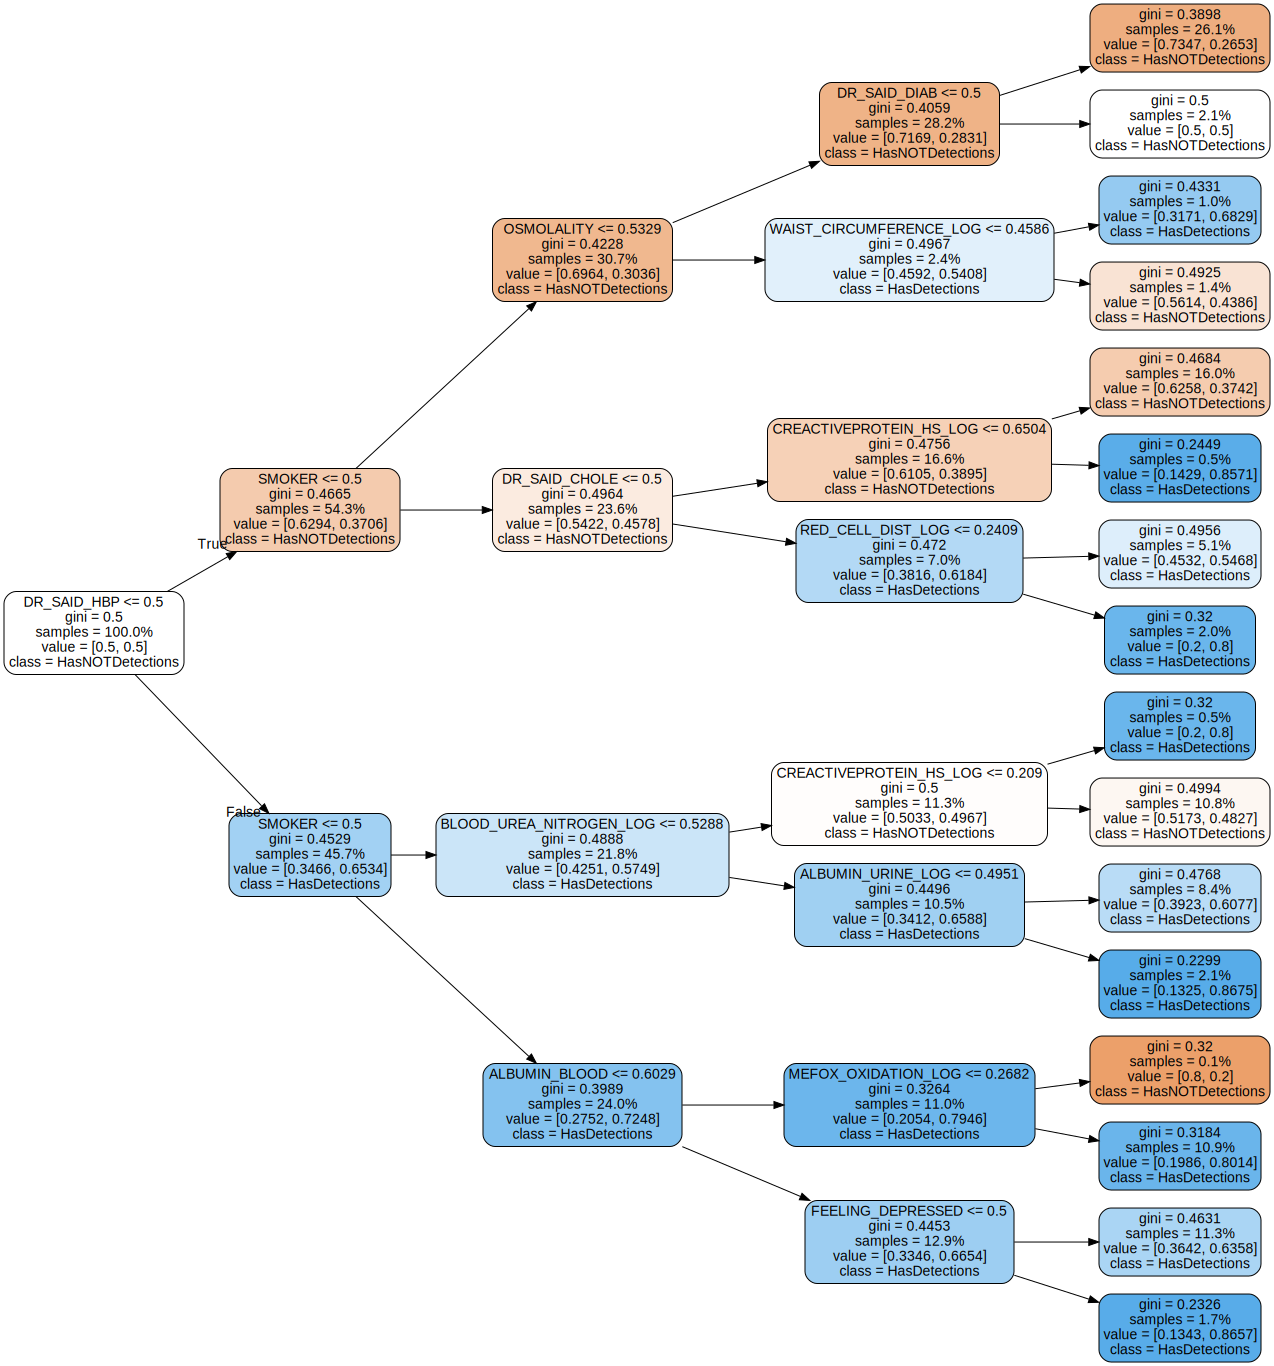

In [ ]:
import graphviz
graphviz.Source(dot_data, format = 'png')

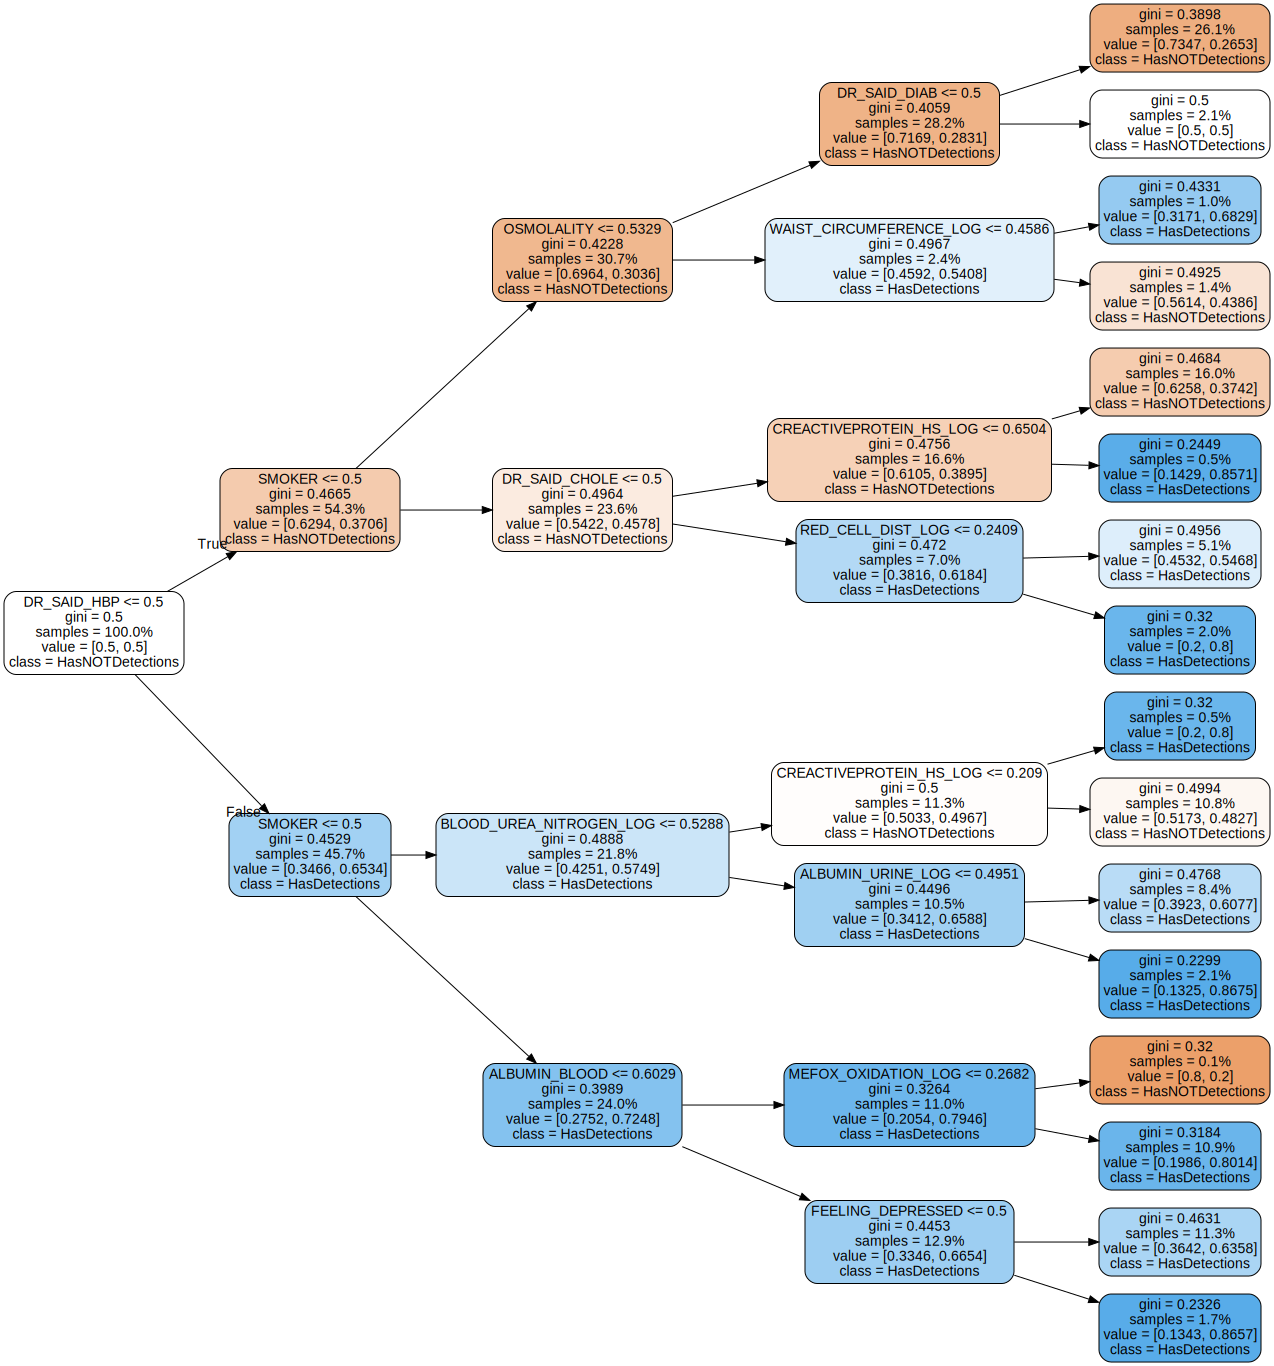

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph2.write_png("tree.png")

from google.colab import files
files.download("tree.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MLC4.3: Model evaluation: DecisionTreeClassifier




#### Opción 1: a través de los resultados

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred.shape

(3993, 1)

In [ ]:
results_df = pd.DataFrame(y_test).join(y_test_pred, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_df['Success'] = (results_df['HEART_DISEASE_original'] == results_df['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_df.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        1        1
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_df['Success'].count()

np.int64(3993)

In [ ]:
results_df['Success'].sum()

np.int64(2681)

In [ ]:
results_df['Success'].mean()

np.float64(0.6714249937390433)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 2681 registros de un total de 3993, por tanto el Accuracy es 0.6714249937390433.


#### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix = pd.crosstab(results_df['HEART_DISEASE_original'] , results_df['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2165  974
1                         338  516

In [ ]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.6714249937390433)

#### Opción 3: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      3139
           1       0.35      0.60      0.44       854

    accuracy                           0.67      3993
   macro avg       0.61      0.65      0.60      3993
weighted avg       0.75      0.67      0.70      3993

